
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Gonzalo Gacitua Hernández

**Rol**: 201551544-1

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
#verifiquemos con describe
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
#veamos que tipo de datos tiene digits
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
c00       1797 non-null int32
c01       1797 non-null int32
c02       1797 non-null int32
c03       1797 non-null int32
c04       1797 non-null int32
c05       1797 non-null int32
c06       1797 non-null int32
c07       1797 non-null int32
c08       1797 non-null int32
c09       1797 non-null int32
c10       1797 non-null int32
c11       1797 non-null int32
c12       1797 non-null int32
c13       1797 non-null int32
c14       1797 non-null int32
c15       1797 non-null int32
c16       1797 non-null int32
c17       1797 non-null int32
c18       1797 non-null int32
c19       1797 non-null int32
c20       1797 non-null int32
c21       1797 non-null int32
c22       1797 non-null int32
c23       1797 non-null int32
c24       1797 non-null int32
c25       1797 non-null int32
c26       1797 non-null int32
c27       1797 non-null int32
c28       1797 non-null int32
c29       1797 non-null

1) Desde lo anterior notamos que los datos se distribuyen en el dataframe digits en columnas llamadas $c_i$ donde $i$ corresponde a la i-ésima columna, con i entre 0 y 63, además del target. 

2) Según el comando info, se está utilizando 456.3 KB de memoria

3) Según info, el tipo de datos que se tienen son del tipo int32

4) Hay 1797 datos en cada columna

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [8]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

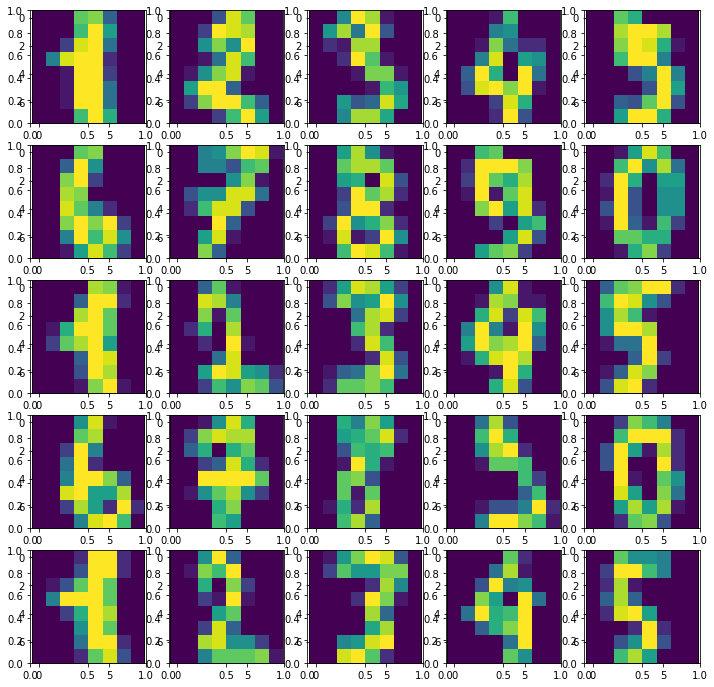

In [9]:
#haremos todos los plot de una
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(1,nx*ny+1):
    image=digits_dict['images'][i] 
    fig.add_subplot(nx, ny, i)
    plt.imshow(image)
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [10]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#se crea el split, con un test size de 33% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

**Haremos el Regresor logístico:**

In [13]:
from sklearn.linear_model import LogisticRegression
Regresor=LogisticRegression()
Regresor.fit(X_train,y_train)

C:\Users\56982\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\56982\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Ahora KNN:**

In [14]:
#desde la fuente https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
#se encontró una forma de usar KNN con gridsearch, pero se adaptó un poco
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
grid_params={
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform','distance'],
}
gs= GridSearchCV(
    knn,
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1
)
gs_results=gs.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   24.3s finished


**Usaremos el Perceptrón, uno de los métodos más básicos, pero es bien flexible**

In [15]:
from sklearn.linear_model import Perceptron

Perceptron=Perceptron(tol=1e-3,random_state=0)
Perceptron.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

# EVALUEMOS LAS MÉTRICAS

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Vamos a usar la matriz de confusión y classification_report, que nos entrega la precision, el recall y el f-score.

**Regresor Logístico**

In [17]:
Regresor.score(X_test,y_test)

0.9579124579124579

In [18]:
y_hat=Regresor.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[61,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  1,  1,  0,  6,  0],
       [ 0,  1, 53,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 65,  0,  0,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 65,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 49,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  2, 60]], dtype=int64)

In [19]:
f1_score(y_test,y_hat,average='micro')

0.9579124579124579

In [20]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.94      0.86      0.90        59
           2       1.00      0.96      0.98        55
           3       0.98      0.96      0.97        68
           4       0.97      0.98      0.98        66
           5       0.94      0.96      0.95        52
           6       0.98      1.00      0.99        54
           7       1.00      0.98      0.99        62
           8       0.82      0.96      0.88        51
           9       0.94      0.94      0.94        64

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594



**KNN**

In [21]:
gs_results.score(X_test,y_test)

0.9865319865319865

In [22]:
y_hat2=gs_results.predict(X_test)
confusion_matrix(y_test, y_hat2)

array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 68,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  1, 60]], dtype=int64)

In [23]:
f1_score(y_test,y_hat2,average='micro')

0.9865319865319865

In [24]:
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.97      1.00      0.98        59
           2       1.00      0.98      0.99        55
           3       0.99      1.00      0.99        68
           4       1.00      1.00      1.00        66
           5       0.98      0.98      0.98        52
           6       1.00      1.00      1.00        54
           7       0.98      0.98      0.98        62
           8       0.98      0.98      0.98        51
           9       0.97      0.94      0.95        64

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



**Perceptron**

In [25]:
Perceptron.score(X_test,y_test)

0.9494949494949495

In [26]:
y_hat3= Perceptron.predict(X_test)
confusion_matrix(y_test, y_hat3)

array([[62,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 54,  0,  1,  1,  0,  2,  0,  1,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 67,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0, 63,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0, 49,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0, 58,  0,  1],
       [ 0,  1,  0,  3,  0,  1,  2,  0, 43,  1],
       [ 0,  2,  0,  1,  0,  1,  0,  0,  0, 60]], dtype=int64)

In [27]:
print(classification_report(y_test,y_hat3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.89      0.92      0.90        59
           2       1.00      0.98      0.99        55
           3       0.89      0.99      0.94        68
           4       0.98      0.95      0.97        66
           5       0.94      0.94      0.94        52
           6       0.93      1.00      0.96        54
           7       0.98      0.94      0.96        62
           8       0.93      0.84      0.89        51
           9       0.95      0.94      0.94        64

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594



### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

**Veamos Cross Validation para KNN**

In [28]:
from sklearn.model_selection import cross_validate
cv_validate=cross_validate(gs_results, X, y, cv=10)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  60 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished


In [29]:
#veamos los resultados!
for i in range (0,len(cv_validate['test_score'])):
    print('El score de la clase '+str(i)+' es: '+str(cv_validate['test_score'][i]))


El score de la clase 0 es: 0.9405405405405406
El score de la clase 1 es: 1.0
El score de la clase 2 es: 0.988950276243094
El score de la clase 3 es: 0.9888888888888889
El score de la clase 4 es: 0.9608938547486033
El score de la clase 5 es: 0.9888268156424581
El score de la clase 6 es: 0.9888268156424581
El score de la clase 7 es: 0.9831460674157303
El score de la clase 8 es: 0.9774011299435028
El score de la clase 9 es: 0.9715909090909091


C:\Users\56982\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


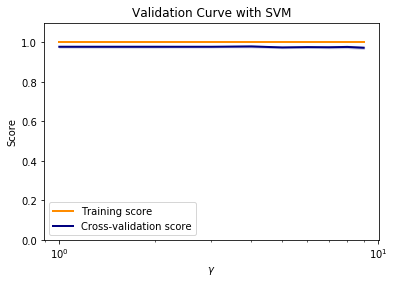

In [30]:
from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range(1, 10)])

#Validation curve usando lo obtenido con GridSearch 
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(weights = 'distance',
                         metric = 'euclidean'),
    X_train, y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Se puede observar que la línea del training score y del cross-validation son muy buenas, casi constante=1. Por ende, el método es muy bueno. 

In [31]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

index = np.argmax(test_scores_mean)
param_range[index]

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

n_samples, n_features = X.shape

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    train_size=0.80,
                                                    random_state=2020)

classifier = KNeighborsClassifier(weights = 'distance',metric = 'euclidean', n_neighbors = param_range[index])
y_score = classifier.fit(x_train, y_train).predict(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

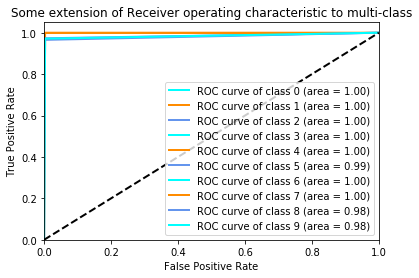

In [32]:

#AOC-ROC para multiples clases (código también obtenido del link)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

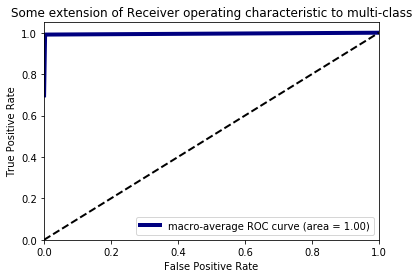

In [33]:
#Curva promedio de las multi-clases

import sys
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [34]:
#SELECCIÓN DE ATRIBUTOS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x_training = digits.drop(columns="target")
y_training = digits["target"]
x_training = x_training.drop(['c00','c32','c39'],axis=1)


k = 30  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
X_a=x_training[atributos]

In [35]:
import time
start_time = time.time()
knn_grid_result = gs_results.fit(x_training, y_training)
print("%s segundos, que demora sin selección de atributos" % (time.time() - start_time))

start_time = time.time()
knn_grid_result = gs_results.fit(X_a, y_training)
print('%s segundos, que demora tras hacer la seleccionar atributos' % (time.time() - start_time))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


128.31769156455994 segundos, que demora sin selección de atributos
Fitting 3 folds for each of 20 candidates, totalling 60 fits
0.456026554107666 segundos, que demora tras hacer la seleccionar atributos


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


Se ve que tras hacer la selección de atributos cambió bastante la cantidad de tiempo, se redujo desde poco más de 2 minutos a menos de medio segundo. Más de 280 veces más rápido. Un cambio tremendamente significativo.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [36]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test
    y_aux_true = y_test
    y_aux_pred = y_pred

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

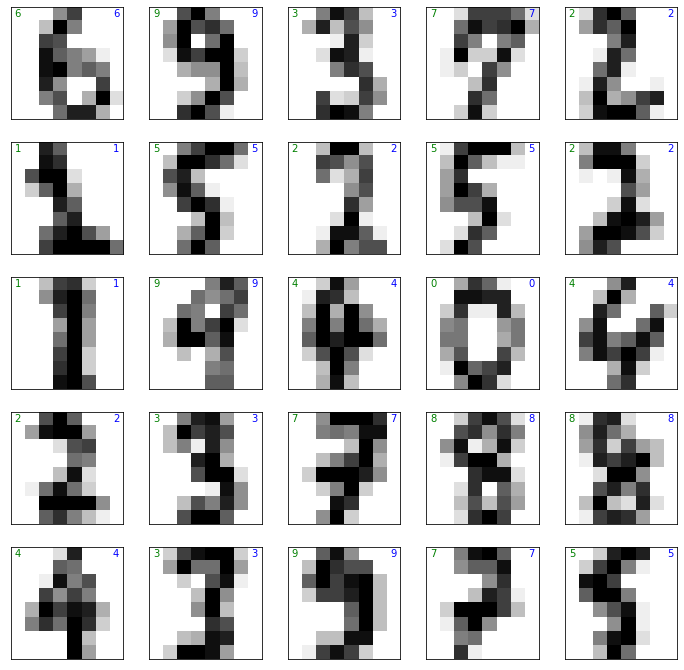

In [37]:
#valor predicho e iguales
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

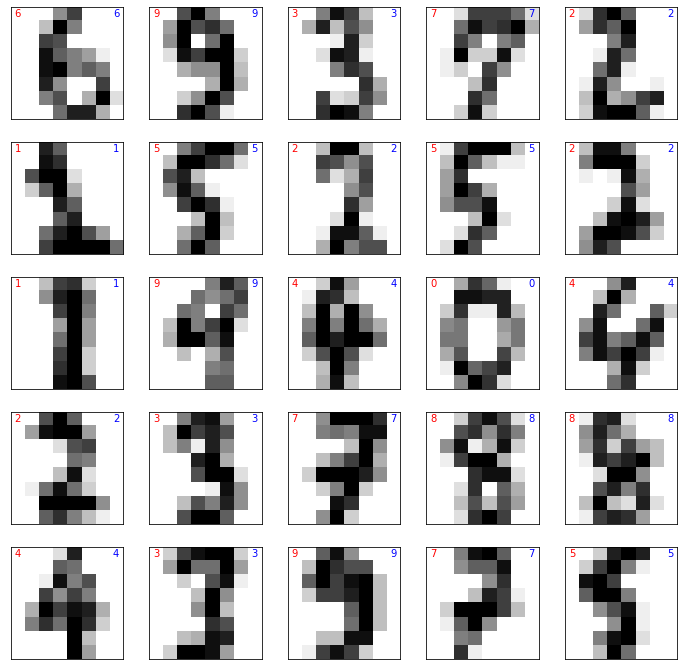

In [38]:
#valor predicho y distintos
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "incorrectos")

Las fallas de predicción se producen por elementos que, pueden ser probabilísticos, o sea que por azar la máquina predijo mal, o puede ser que en la nube de puntos del sistema, el hiperplano que se utiliza para separar no logró hacer bien su trabajo.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.
Por alguna razón, el programa me entrega que las que estan bien etiquetadas y las que están mal son las mismas, dando luces de que puede haber overfitting en el sistema. Puede que se haya dado por que el número de vecinos tomados al usar KNN.
Respecto a trabajos futuros, podría fittearse algún otro modelo que quizá se comporte mejor. 


Podría intentarse usar quizás algún árbol de decisión o ya llegar a algo más potente como utilizar redes neuronales. Ahora como el problema es relativamente sencillo, quizás podría utilizrse algún modelo como el One vs One o el One vs all para tratar de identificar.

Lo más complejo de esto, creo a mi gusto que es ingeniarselas para que el programa identifique bien. Tengo la suerte de haber cursado Machine Learning este semestre, así que muchas de las cosas que se utilizaron acá ya las conocía de antemano, y las tuve que hacer en otras instancias. Sin embargo, no es sencillo hacer identificación de imágenes cuando son tan borrosas. Una posible solución a esto sería aumentar la cantidad de pixeles y tratar de aclarar la imagen, para después identificar.